In [25]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.integrate import odeint, solve_ivp

In [26]:
'''This is the initial state given to us in the question'''
initial_state = [0., 1., 0.]

'''These are the parameters given to us'''
sigma = 10.
rho   = 28.
beta  = 8./3.

'''Here is the end time given to us'''
start_time = 0
end_time = 60
time_points = np.linspace(start_time, end_time, end_time*60)

In [27]:
'''This is the lorenz system of equations'''

def lorenz_system(current_state, t):
    
    x, y, z = current_state
    
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    return [dx_dt, dy_dt, dz_dt]

In [28]:
'''I have used odeint(), this integrates. I did some research on how these commands work, and was pleased with my results'''

xyz = odeint(lorenz_system, initial_state, time_points)

'''Dealing with arrays'''
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

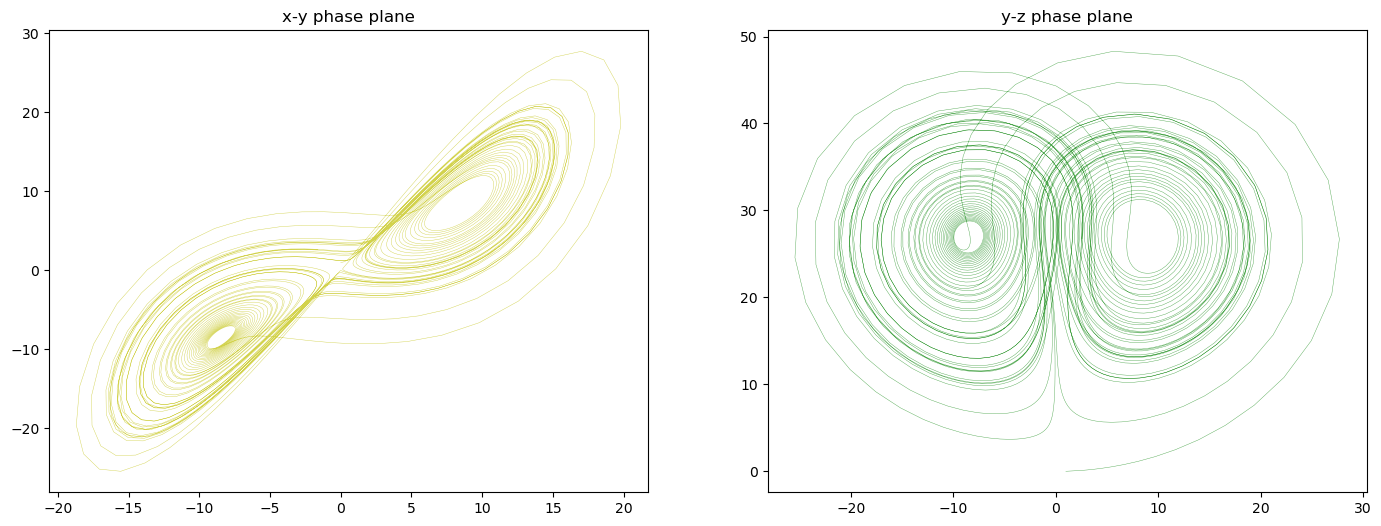

In [29]:
'''The question wants us to replicate the 2d diagrams from the article:'''
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(17, 6))

'''X vs Y'''
ax[0].plot(x, y, color='y', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')


'''Y vs Z'''
ax[1].plot(y, z, color='g', alpha=0.7, linewidth=0.3)
ax[1].set_title('y-z phase plane')


plt.show()

Text(0.5, 0.92, 'Lorenz Figure 3d')

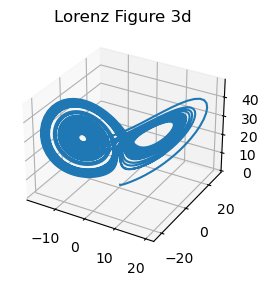

In [32]:
'''I did lots of research and practise and decided to make the 3d version aswell, just as something extra'''
'''**** Here, there was a lot of trial/error so I started from fresh, which is why things are labelled differently ****'''

σ = 10.
r = 28.
b = 8./3

W0 = [0., 1., 0.]
p = (σ, b, r)

def lorenz(t, var, σ, b, r):
    X, Y, Z = var
    dx = - σ * (X - Y)
    dy = r*X - Y - X*Z
    dz = -b*Z + X*Y
    
    return [dx, dy, dz]
t_span = (0, 60)
t = np.arange(10, 60, 0.01)

result_odeint = odeint(lorenz, W0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, W0, args=p)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot(result_odeint[:,0], result_odeint[:,1], result_odeint[:,2])
ax.set_title("Lorenz Figure 3d")

Text(0.5, 1.0, 'Lorenz Figure 1')

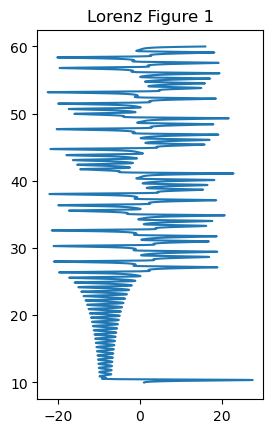

In [38]:
result_odeint = odeint(lorenz, W0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, W0, args=p)
fig = plt.figure()
ax = fig.add_subplot(1,2,1,)
ax.plot(result_odeint[:,1], t)
ax.set_title("Lorenz Figure 1")

In [41]:
'''Now, in part 5 of question 2, we are given a new set of parameters (W)'''
'''I will keep most things the same, but change W:'''

σ = 10.
r = 28.
b = 8./3

W0 = [0., 1., 0.]
W_ = [0., 1.00000001, 0.]
W_ = W0 + [0., 1*10**-8, 0.]
p = (σ, b, r)

def lorenz(t, var, σ, b, r):
    X, Y, Z = var
    dx = - σ * (X - Y)
    dy = r*X - Y - X*Z
    dz = -b*Z + X*Y
    
    return [dx, dy, dz]
t_span = (0, 60)
t = np.arange(10, 60, 0.01)

result_odeint = odeint(lorenz, W0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, W0, args=p)

In [62]:
result_odeint_ = odeint(lorenz, W_, t, p, tfirst=True)
result_solve_ivp_ = solve_ivp(lorenz, t_span, W_, args=p)

In [76]:
d = np.zeros(len(result_odeint))
for i in range(len(result_odeint)):
    d[i]=np.linalg.norm(result_odeint[i]-result_odeint_[i])
d

array([9.99999994e-09, 1.00803490e-08, 1.04847763e-08, ...,
       2.13881912e+01, 2.19603219e+01, 2.26947730e+01])

/var/folders/3j/jpfkwt9149sdwgtqwp09ydt80000gn/T/ipykernel_3927/1937184959.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,100])


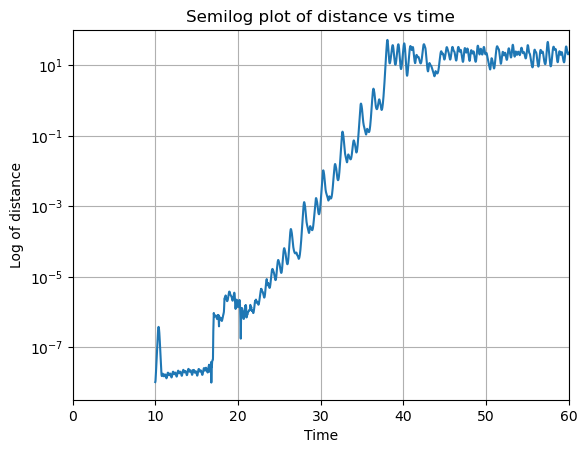

In [80]:
'''Now, we must plot distance vs time'''

'''Distance as the semilog plot and time linearly'''
plt.grid(True, which="both")
plt.plot(t, d)
plt.yscale('log')

plt.ylim([0,100])
plt.xlim([0, 60])
plt.title("Semilog plot of distance vs time")
plt.xlabel("Time")
plt.ylabel("Log of distance")
plt.show()

In [53]:
print(distance)

[0.0, 9.99999993922529e-09, 0.0]
